<a href="https://colab.research.google.com/github/PALAKKUSHWAHA/ML-PROJECT-Phishing-Website-Detection/blob/DATA-SCIENCE/WEBSITE_PHISHING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data0 = pd.read_csv('/content/5.MLurldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
# information and Checking the shape of the dataset
#Listing the features of the dataset
data0.shape

data0.columns
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

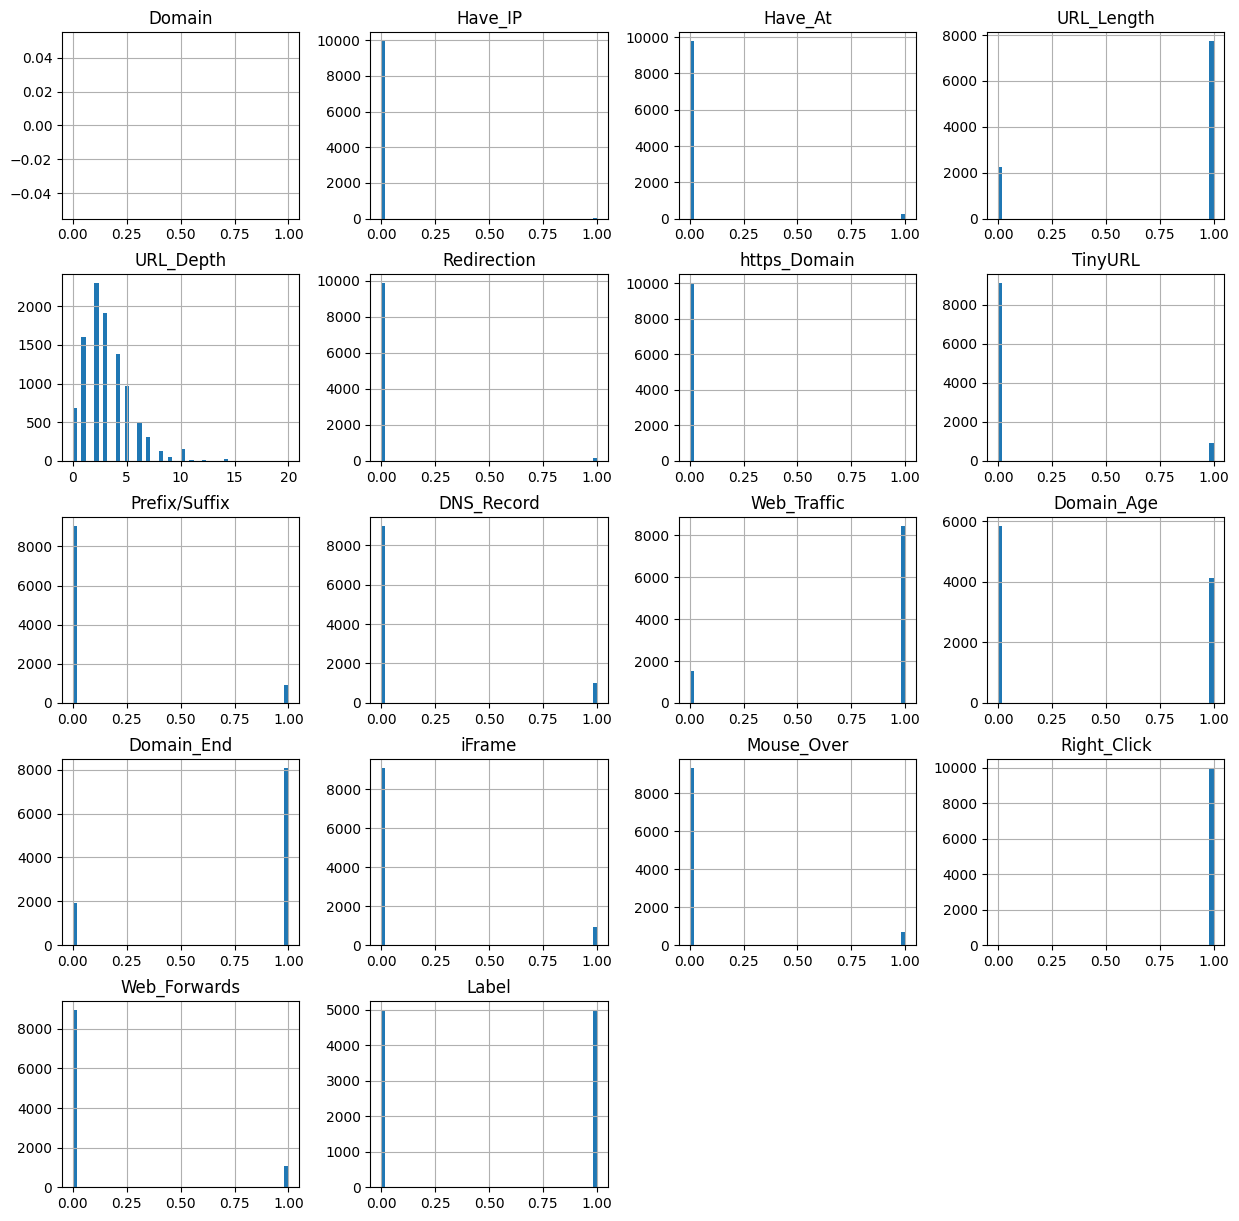

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [ ]:
#Visualizing the data**
#Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

In [ ]:
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,NaN,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,NaN,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,NaN,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,NaN,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,NaN,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
data0['Domain'].dtype

dtype('float64')

In [ ]:
data0['Domain'] = pd.to_numeric(data0['Domain'], errors='coerce')

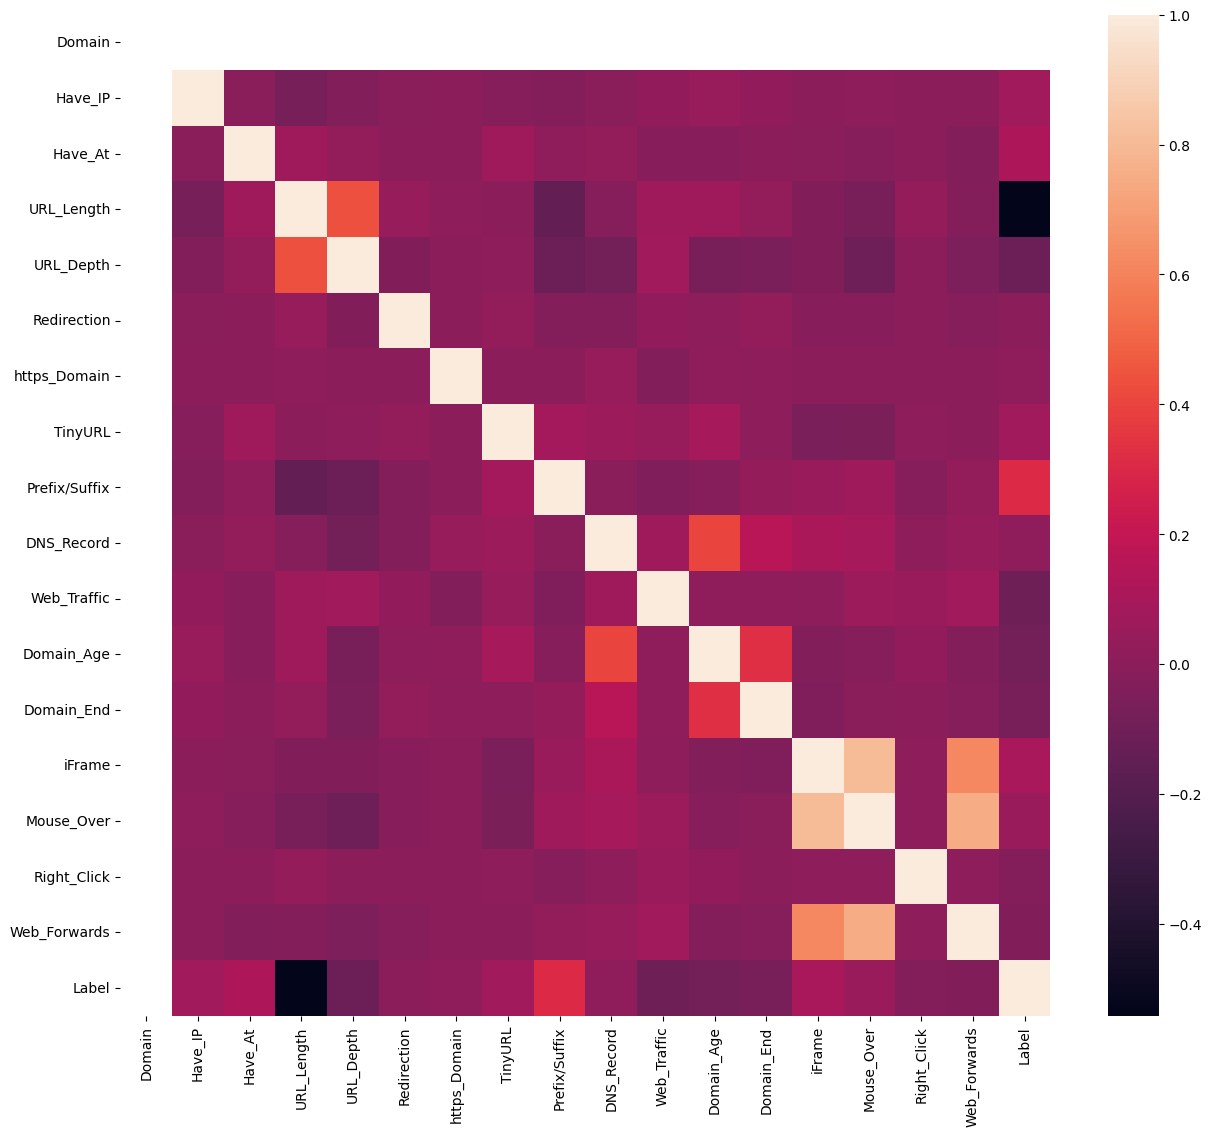

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

In [ ]:
#5. Data Preprocessing & EDA**
#Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.#

In [ ]:
data0.describe()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,0.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,NaN,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,NaN,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,NaN,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,NaN,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,NaN,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,NaN,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [ ]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,2,0,0,0,0,0,0,1,1,0,0,1,0,0
1,0,0,1,2,0,0,1,0,0,1,0,0,0,0,1,0,1
2,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,0
3,0,1,1,4,0,0,0,1,0,1,0,1,0,0,1,0,1
4,0,0,1,5,0,0,0,0,0,1,1,1,0,0,1,0,1


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
print(X_train.shape, X_test.shape)

(8000, 16) (2000, 16)


In [ ]:
#7. Machine Learning Models & Training**

#From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

#This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
#* Decision Tree
#* Random Forest
#* Multilayer Perceptrons
#* XGBoost
#* Autoencoder Neural Network
#* Support Vector Machines///

In [ ]:
from sklearn.metrics import accuracy_score
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
#7.1. Decision Tree Classifier**
# Decision trees are widely used models for classification and regression tasks.

from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(max_depth = 5)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.816
Decision Tree: Accuracy on test Data: 0.794


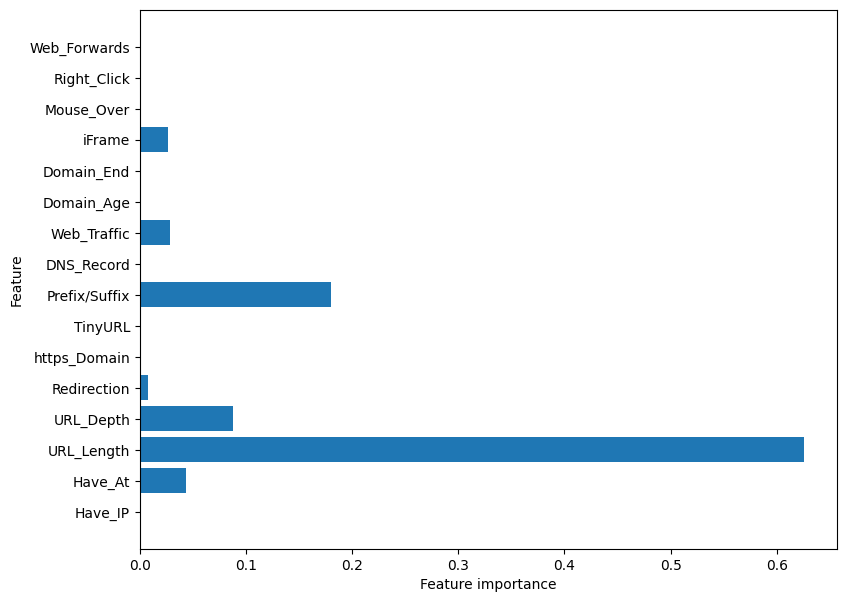

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [ ]:
### **7.2. Random Forest Classifier**
#Random forests for regression and classification are currently among the most widely used machine learning methods.

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.822
Random forest: Accuracy on test Data: 0.802


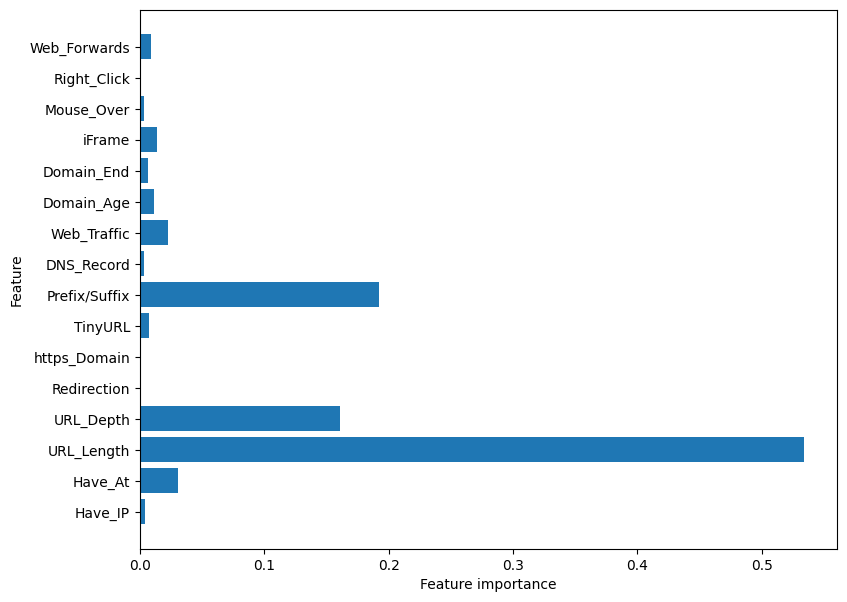

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [ ]:
#7.3. Multilayer Perceptrons (MLPs): Deep Learning**
#Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.


In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.867
Multilayer Perceptrons: Accuracy on test Data: 0.853


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [ ]:
### **7.5. Autoencoder Neural Network**
#An auto encoder is a neural network that has the same number of input neurons as it does outputs.

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 14)                238       
                                                                 
 dense_5 (Dense)             (None, 16)                240       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
Total params: 1294 (5.05 KB)
Trainable params: 1294 (5.05 KB)

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                                        metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/10
100/100 [==============================] - 2s 9ms/step - loss: 1.3411 - accuracy: 0.4247 - val_loss: -0.2008 - val_accuracy: 0.8444
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: -0.2221 - accuracy: 0.8406 - val_loss: -0.2100 - val_accuracy: 0.8444
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: -0.2424 - accuracy: 0.8406 - val_loss: -0.2477 - val_accuracy: 0.8444
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: -0.2692 - accuracy: 0.8405 - val_loss: -0.2689 - val_accuracy: 0.8444
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: -0.2822 - accuracy: 0.8402 - val_loss: -0.2855 - val_accuracy: 0.8444
Epoch 6/10
100/100 [==============================] - 0s 3ms/step - loss: -0.3052 - accuracy: 0.8397 - val_loss: -0.3052 - val_accuracy: 0.8431
Epoch 7/10
100/100 [==============================] - 0s 3ms/step - loss: -0.6406 - accuracy: 0.8394 - val_loss: -0.6796 - val_accuracy: 

In [ ]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

63/63 [==============================] - 0s 2ms/step - loss: -1.8584 - accuracy: 0.6805

Autoencoder: Accuracy on training Data: 0.664
Autoencoder: Accuracy on test Data: 0.680


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

In [ ]:
### **7.6. Support Vector Machines**

#In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.807
SVM : Accuracy on test Data: 0.784


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
        'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.816,0.794
1,Random Forest,0.822,0.802
2,Multilayer Perceptrons,0.867,0.853
3,AutoEncoder,0.664,0.680
4,SVM,0.807,0.784


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,Multilayer Perceptrons,0.867,0.853
1,Random Forest,0.822,0.802
0,Decision Tree,0.816,0.794
4,SVM,0.807,0.784
3,AutoEncoder,0.664,0.680


In [ ]:
#For the above comparision, it is clear that the Multilayer Perceptrons works well with this dataset.

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.870
XGBoost : Accuracy on test Data: 0.848


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [ ]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [ ]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)